# Global Customer Churn

This project showcases the efficacy of various binary classification models in predicting customer churn (1 for churned, and 0 for retained). The project initially covers the utilization of Principal Component Analysis for dimensionality reduction and Logistic Regression (both with gradient ascent and Newton's method). Additionally, we compare the efficacy of Decision Trees, Support Vector Machines, K-Nearest Neighbors, Random Forest, and Gradient Boosting models (from the sklearn library) based on training time and performance metrics.

Customer churn is a core component of marketing analytics and marketing-focused data science. It shows whether a customer has exited, or stopped using, a product/service. This project sheds light onto various data science methodologies and their strengths/weaknesses.

##### Main Questions to be Answered:
- How effective are the Logistic Regression models (from the CSE 6040 curriculum, but with a twist) at predicting customer churn?
- What other models can we use and how do they perform compared to Logistic Regression?
- How well can we predict churn and what does that tell us about shaping business strategy?

##### Contents of this project:
1. Setup: Importing Packages and Loading Data
2. Exploratory Data Visualization
3. Preprocessing the Data
4. PCA for Dimensionality Reduction
5. Logistic Regression
    - Gradient Ascent Approach
    - Newton's Method
6. Other Models
7. Observations / Results

##### The data includes 14 columns:
- RowNumber: A unique identifier for each row in the dataset.
- CustomerId: Unique customer identification number.
- Surname: The last name of the customer (for privacy reasons, consider anonymizing this data if not already done).
- CreditScore: The customer's credit score at the time of data collection.
- Geography: The customer's country or region, providing insights into location-based trends in churn.
- Gender: The customer's gender.
- Age: The customer's age, valuable for demographic analysis.
- Tenure: The number of years the customer has been with the bank.
- Balance: The customer's account balance.
- NumOfProducts: The number of products the customer has purchased or subscribed to.
- HasCrCard: Indicates whether the customer has a credit card (1) or not (0).
- IsActiveMember: Indicates whether the customer is an active member (1) or not (0).
- EstimatedSalary: The customer's estimated salary.
- Exited: The target variable, indicating whether the customer has churned (1) or not (0).

Source of data: https://www.kaggle.com/datasets/anandshaw2001/customer-churn-dataset/data

## 1. Setup: Importing Packages and Loading Data

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import e
import time

In [2]:
# Reading our data into a pandas dataframe
data = pd.read_csv('Churn_Modelling.csv', index_col=False).rename(columns={'Exited': 'Churned'})

# Creating another column based on 'NumOfProducts' that converts it to categorical labels
data['NumOfProducts_Categorical'] = data['NumOfProducts'].astype(str)

# Summary Statistics + Viewing the data
display(data.describe())
display(data.tail())
c = data.columns
print('\033[1m\033[4mData Types for each of the columns\033[0m:')
for c in data.columns:
    print(f'{c}: \033[1m{type(data[c][0])}\033[0m')

# Checking number of unique customers
n_customers = len(data['CustomerId'].unique())
print(f'\nNumber of unique customers: {n_customers}')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,NumOfProducts_Categorical
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,2
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,1


Data Types for each of the columns:
RowNumber: <class 'numpy.int64'>
CustomerId: <class 'numpy.int64'>
Surname: <class 'str'>
CreditScore: <class 'numpy.int64'>
Geography: <class 'str'>
Gender: <class 'str'>
Age: <class 'numpy.int64'>
Tenure: <class 'numpy.int64'>
Balance: <class 'numpy.float64'>
NumOfProducts: <class 'numpy.int64'>
HasCrCard: <class 'numpy.int64'>
IsActiveMember: <class 'numpy.int64'>
EstimatedSalary: <class 'numpy.float64'>
Churned: <class 'numpy.int64'>
NumOfProducts_Categorical: <class 'str'>

Number of unique customers: 10000


There are 10000 data points, which means that there is one data point per customer. Additionally, the formatting of all the relevant columns are accurate, so they can be left as is.

## 2. Exploratory Data Visualization

In [3]:
# Splitting by categorical and continuous data
categorical_cols = ['Geography', 'Gender', 'NumOfProducts_Categorical', 'HasCrCard', 'IsActiveMember']
continuous_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

##### Pairplot of all the X variables split by churn (might take some time to generate):

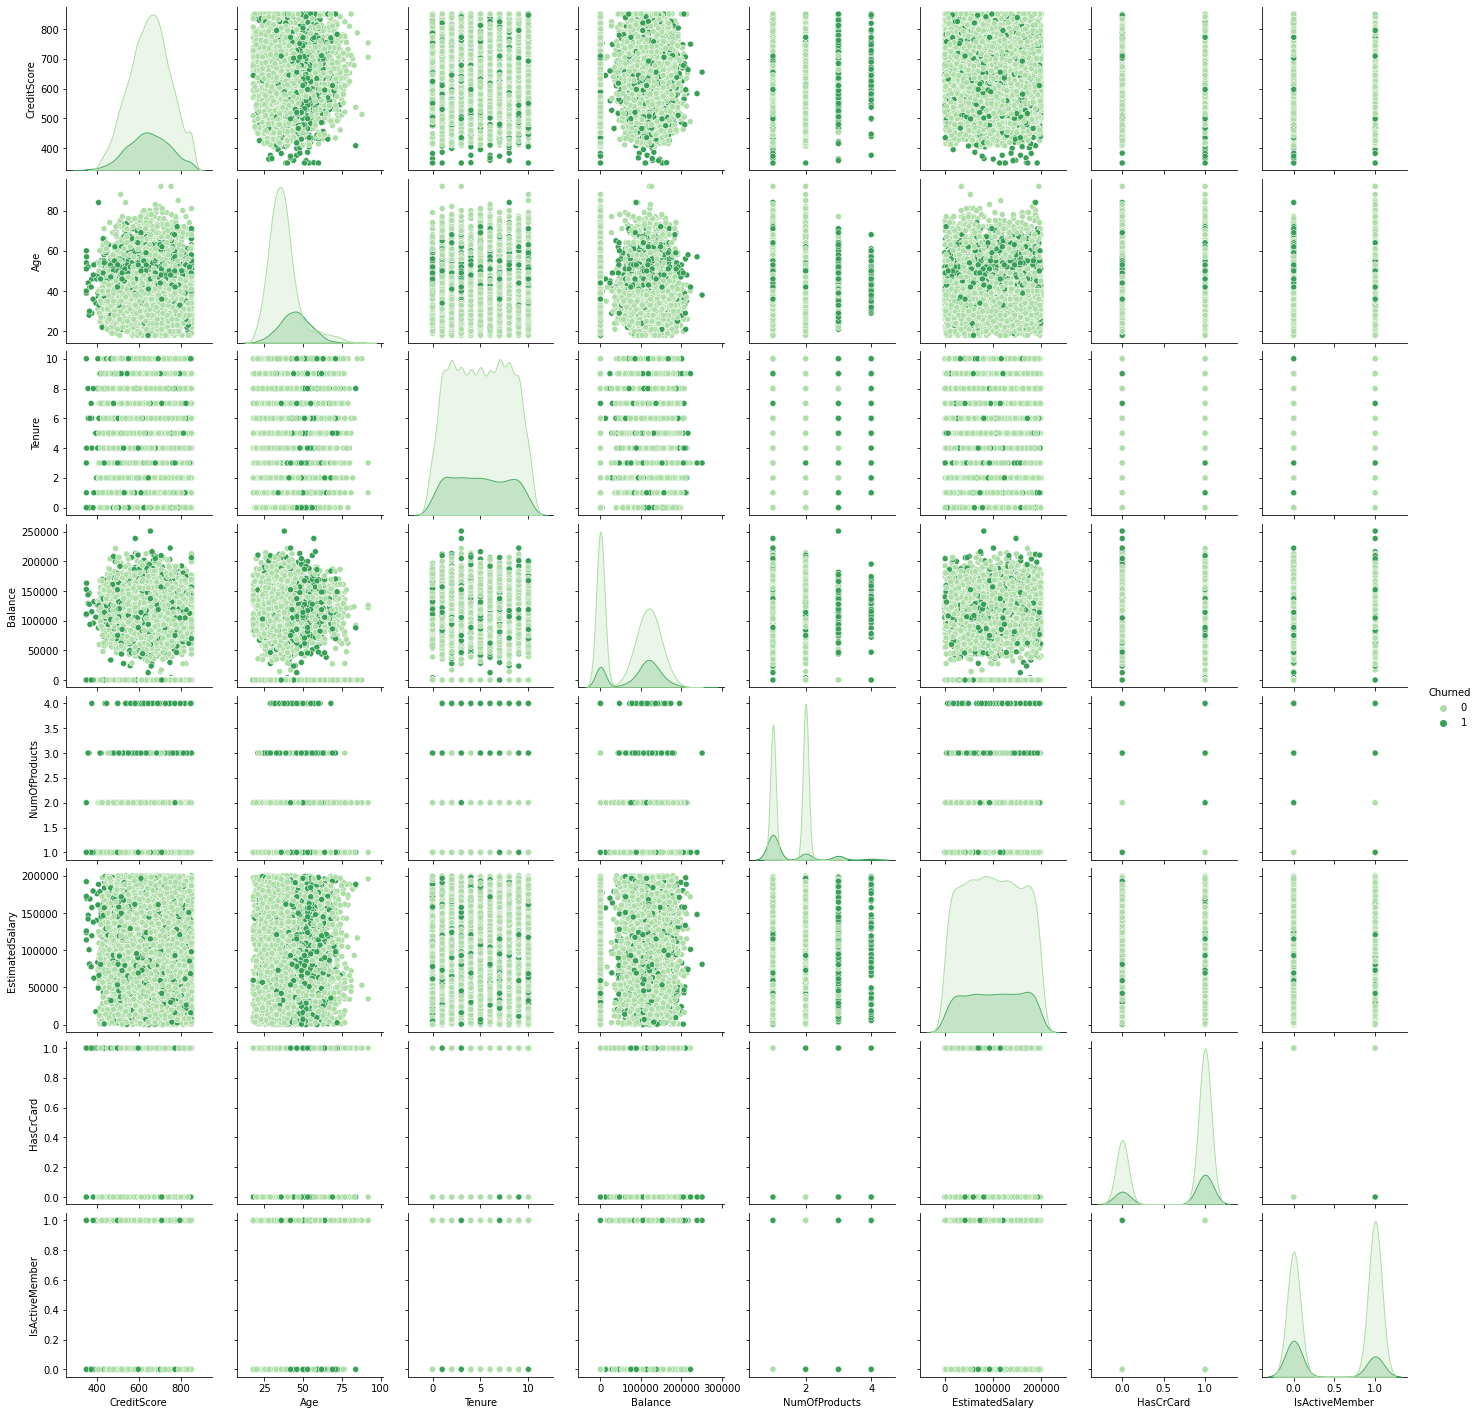

In [4]:
sns.pairplot(data[continuous_cols + categorical_cols + ['Churned']], hue='Churned', palette='Greens')
plt.show()

It is immediately apparent that there is significant correlation between many of the independent variables. It should be noted that since the variables are plotted against each other, the matrix of plots has a diagonal of ones in a sense (because they are correlated to each other). If the plot was viewed as a traingular matrix, all of the relevent information would still be intact.

##### Visualizing the continuous data with histograms:

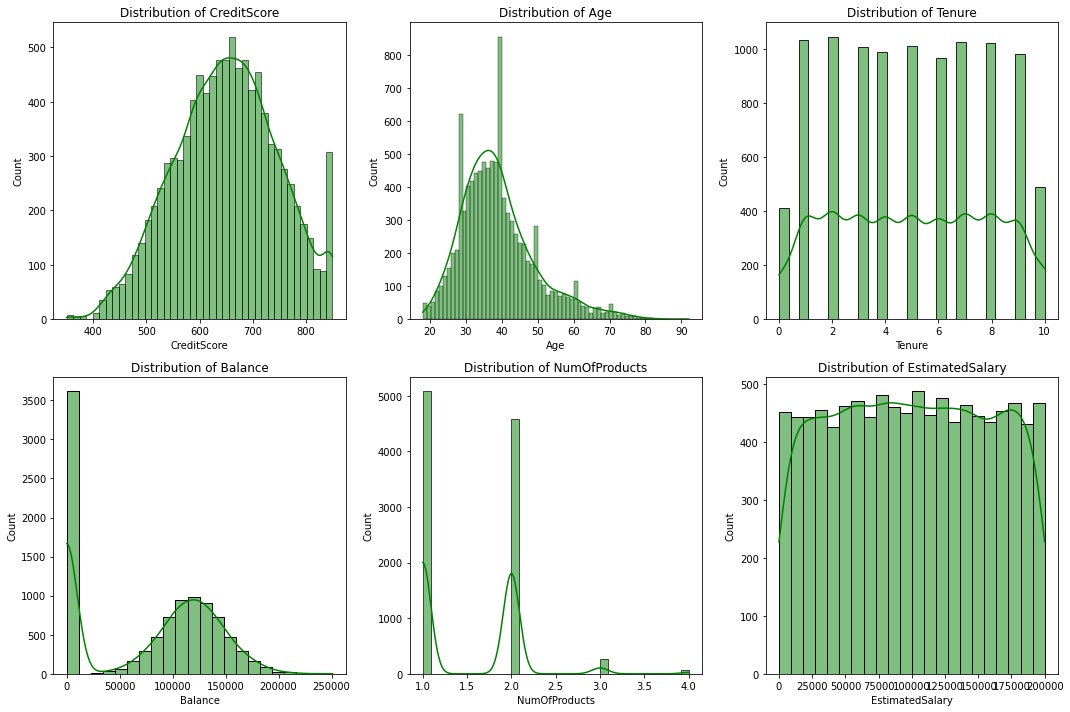

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(continuous_cols):
    ax = axs.flatten()[i]
    sns.histplot(data[col], kde=True, ax=ax, color='g')
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()

The distributions of the CreditScore, Balance, and Age columns are relatively normal with right skew, outliers at 0, and left skewed, respectively. The distribution of NumOfProducts drops significantly at the two product range. The distributions of Tenure and EstimatedSalary are relatively constant throughout.

##### Visualizing the categorical data with count plots:

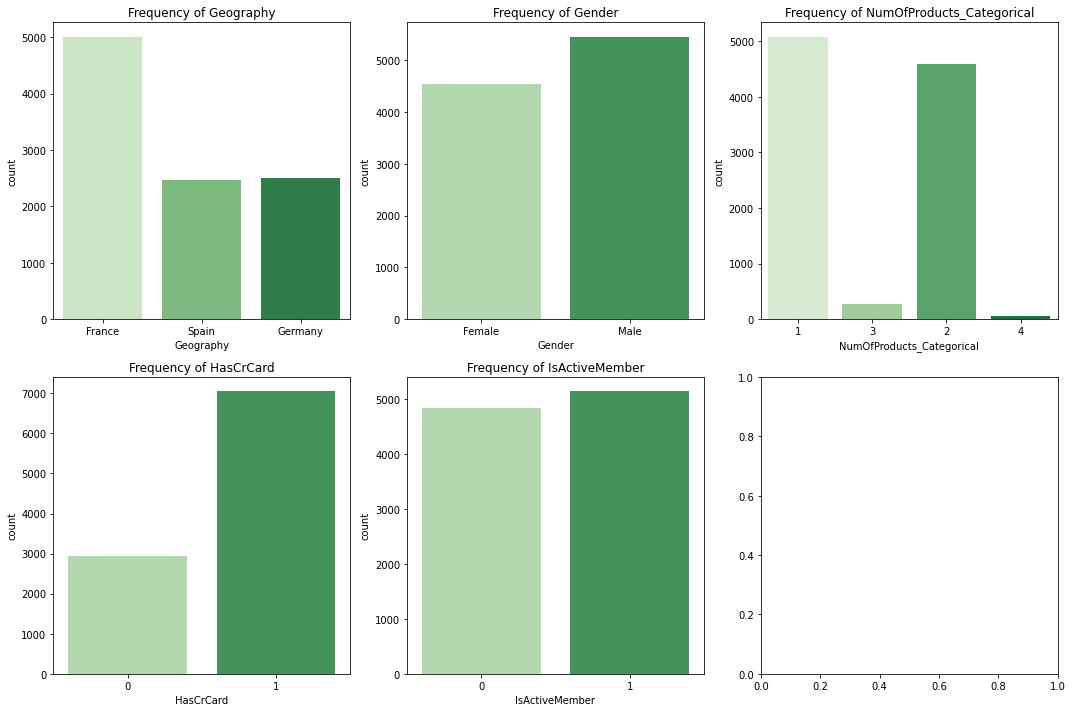

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    ax = axs.flatten()[i]
    sns.countplot(x=data[col], ax=ax, palette='Greens')
    ax.set_title(f'Frequency of {col}')
plt.tight_layout()

The distributions of the categorical variables immediately shows the differences between individual groups within the data. This is especially noticeable in the Geography, HasCrCard, and NumOfProduct_Categorical (same as the continuous version of this data) columns.

##### Distribution of continuous data by churn rates:

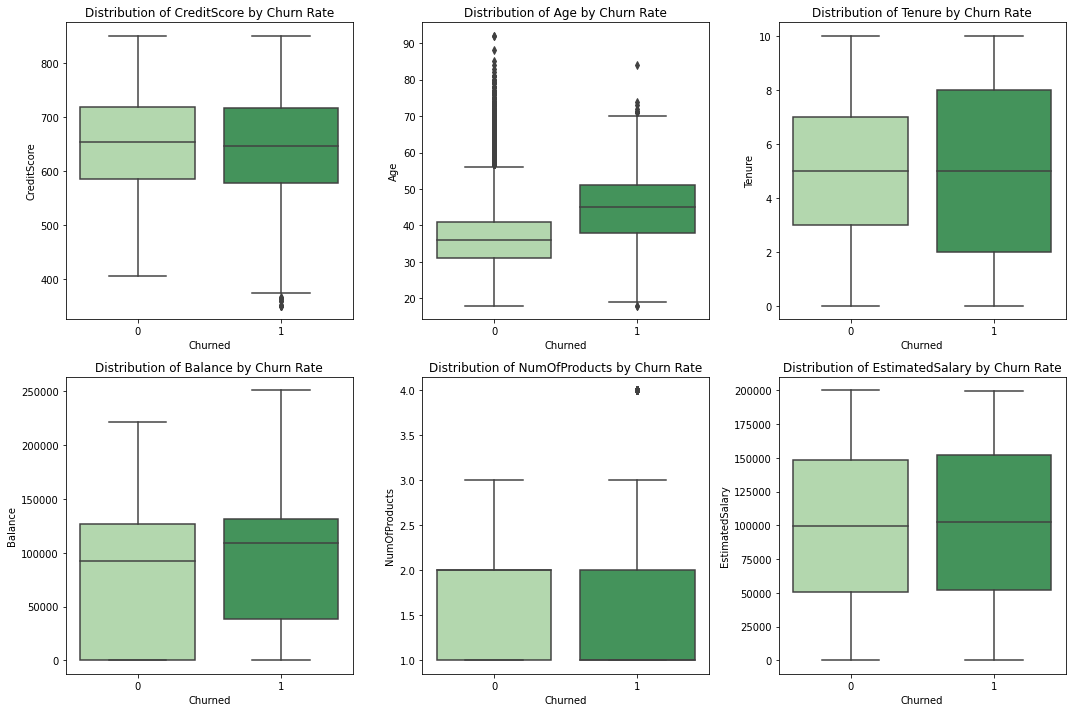

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(continuous_cols):
    ax = axs.flatten()[i]
    sns.boxplot(x='Churned', y=col, data=data, ax=ax, palette='Greens')
    ax.set_title(f'Distribution of {col} by Churn Rate')
plt.tight_layout()

These plots showcase the distributions of the continuous variables across the Churned columns. Although some of the boxplots are nearly identical, there are slight variations in the distributions that the models should be able to learn from.

##### Viewing the proportionality of the categorical variables:

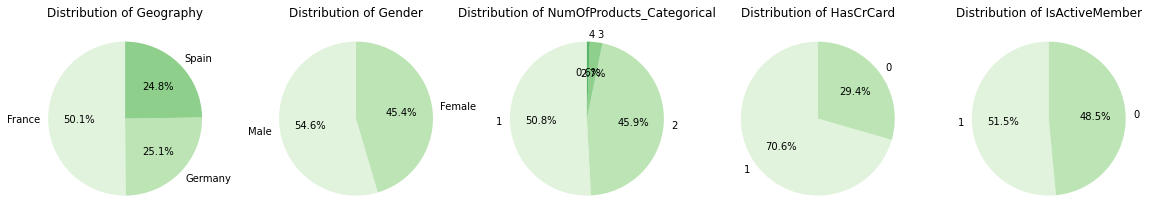

In [8]:
fig, axs = plt.subplots(1, len(categorical_cols), figsize=(20, 4))
palette_color = sns.color_palette('Greens') 
for i, col in enumerate(categorical_cols):
    sizes = data[col].value_counts()
    axs[i].pie(sizes, labels=sizes.index, colors=palette_color, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Distribution of {col}')

These pie charts reiterate the observations from the count plots of the categorical variables from earlier.

## 3. Preprocessing the Data

In [9]:
# Checking the number of NaN values by column
data.isnull().sum()

RowNumber                    0
CustomerId                   0
Surname                      0
CreditScore                  0
Geography                    0
Gender                       0
Age                          0
Tenure                       0
Balance                      0
NumOfProducts                0
HasCrCard                    0
IsActiveMember               0
EstimatedSalary              0
Churned                      0
NumOfProducts_Categorical    0
dtype: int64

There are no null values, so the data is clean!

##### Preparing data for PCA:

In [10]:
# Splitting the data between X and y (independent and dependent variables)
X = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Churned'], axis=1, inplace=False)
y = data[['Churned']]

print('\033[1mOriginal X data\033[0m:')
display(X.head())
print('\n\033[1my data\033[0m:')
display(y.head())

# Creating dummy columns for all of the non-binary categorical columns
X = pd.get_dummies(X, columns=['Geography', 'Gender', 'NumOfProducts_Categorical'])

# Scaling the data using sklearn's StandardScaler function (normalizes the data with mean of 0 and var of 1)
scaler = StandardScaler()
X[continuous_cols] = scaler.fit_transform(X[continuous_cols])


print('\033[1mNormalized X data\033[0m:')
display(X.head())

Original X data:


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_Categorical
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,3
3,699,France,Female,39,1,0.00,2,0,0,93826.63,2
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,1



y data:


,Churned
0,1
1,0
2,1
3,0
4,0


Normalized X data:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_Categorical_1,NumOfProducts_Categorical_2,NumOfProducts_Categorical_3,NumOfProducts_Categorical_4
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,1,0,1,0,0,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1,1,0,1,0,0,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,1,0,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,1,0,0,1,0,0,1,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1,1,0,1,0,0,0


It should be noted that the binary columns are not normalized, so it might affect PCA. For future research, a dimensionality reduction algorithm that accounts for binary variables might be a better approach than PCA.

## 4. PCA for Dimensionality Reduction

##### Finding optimal rank (k) at an error_rate of 0.1 (10%):

In [11]:
### Disclaimer: This methodology was inspired from the curriculum, but improved for the purposes of this project.

def svd_decompose (X, k):
    """Decomposes matrix with numpy.linalg.svd() and obtains top k dimensions for U, Sigma, and VT."""
    
    from numpy.linalg import svd
    assert k > 0
    Uk, Sk, VTk = svd(X, full_matrices=False)
    
    return (Uk[:,:k], Sk[:k], VTk[:k,:])

def compression_error (Sigma, k):
    """Computes the compression error of the svd_decompose() function."""
    
    return Sigma[k:].dot(Sigma[k:])**0.5 / Sigma.dot(Sigma)**0.5

def find_rank (Sigma, error_rate=0.1):
    """Finds rank based on Sigma and desired error rate."""
    
    for i in range(len(Sigma) - 1):
        k = i + 1
        error = compression_error(Sigma, k)
        if error <= error_rate:
            break
            
    print(f'\n\033[1mCompression Error\033[0m: {error}')
    
    return k

# Getting the full SVD decomposition matrices without reduced dimensionality
U, Sigma, VT = svd_decompose (X, X.shape[1])
print('\n\033[1mShapes of SVD Matrices\033[0m:')
print(U.shape, Sigma.shape, VT.shape)

# Finding optimal rank (k) to use for our analysis
error_rate = 0.1
k = find_rank(Sigma, error_rate=error_rate)
print(f'There are \033[1m{k}\033[0m relevant features at an error rate of \033[1m{error_rate}\033[0m.')


Shapes of SVD Matrices:
(10000, 17) (17,) (17, 17)

Compression Error: 0.036034027036750044
There are 13 relevant features at an error rate of 0.1.


Upon some trial and error, setting the error_rate to 0.1 was sufficient for the algorithm to find an optimal solution with a compression error of ~3.6%.

##### Compressing X into k relevant features:

In [12]:
Uk, Sk, VTk = svd_decompose (X, k)

In [13]:
X_compressed = X.dot(VTk.T)
X_compressed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.920329,-0.233154,-0.891952,0.366743,0.377748,0.564963,1.593399,-0.798865,-0.186946,-0.188478,0.304293,-0.370980,-0.008673
1,1.202246,-1.022107,-0.841107,0.372458,0.701024,0.910292,0.500477,-0.703420,0.828689,-0.801844,-0.391735,0.303778,-0.269650
2,1.048040,1.130597,0.482713,1.563976,0.017376,-0.815394,-2.291463,-0.811533,-0.986233,0.440422,-0.887329,-0.828946,-1.144493
3,0.906008,1.585250,-1.001314,-0.545111,0.571596,0.842230,0.562004,-0.719795,-0.517656,0.110221,0.039768,0.720785,-0.197300
4,1.716243,-1.330643,-0.789249,-2.155699,0.554108,0.221143,0.080376,-0.745670,0.794489,-0.279541,-0.622264,-0.254967,0.108540


## 5. Logistic Regression

In [14]:
# Splitting the data into training and testing with a test_size of 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_compressed, y, test_size=0.25, random_state=42)

##### Defining functions for Logistic Regression:

In [15]:
### Disclaimer: This methodology was inspired from the curriculum, but improved for the purposes of this project.


from numpy.linalg import solve
from scipy.special import expit as sigmoid

def grad_log_likelihood(theta, y, X):
    """Returns the gradient of the log-likelihood."""
    
    p = sigmoid(X.dot(theta))
    
    return X.T.dot(y - p)

def hess_log_likelihood(theta, X):
    """Returns the Hessian (second derivative) of the log-likelihood."""
    
    p = sigmoid(X.dot(theta))
    p2 = sigmoid(-X.dot(theta))
    
    return -(np.multiply(X, p).T.dot(np.multiply(X, p2)))

def heaviside_int(Y):
    """Evaluates the Heaviside function, returning integer values."""
    
    return np.heaviside(Y, 1).astype(int)

def gen_lin_discr_labels(points, theta, fun=heaviside_int):
    """Generate labels using a linear discriminant and a threshold function."""
    
    score = points.dot(theta)
    labels = fun(score)
    
    return labels

def compute_log_loss (theta, X, y):
    """Computes the logistic loss using the log loss function."""
    
    probabilities = sigmoid(X.dot(theta))
    eps = 1e-10
    probabilities = np.clip(probabilities, eps, 1 - eps)
    loss = -np.mean(y * np.log(probabilities) + (1 - y) * np.log(1 - probabilities))
    
    return loss

def adjust_learning_rate(initial_lr, iteration, decay_rate=0.99):
    """Adjusts the learning rate based on the iteration and decay rate."""
    
    return initial_lr * (decay_rate ** iteration)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
                            roc_curve, auc, precision_recall_curve, average_precision_score
def plot_data(X_test, y_test, theta):
    """Generates prediction labels and performance metrics to gauge model performance."""
    
    # Data Preparation
    y_pred = gen_lin_discr_labels(X_test, theta) # Generate predictions
    probabilities = sigmoid(X_test.dot(theta)) # Calculating probabilities

    # Data Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Model accuracy: \033[1m{accuracy}\033[0m')
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # ROC / AUC
    fp, tp, thresholds = roc_curve(y_test, probabilities)
    roc_auc = auc(fp, tp)
    
    # Precision-Recall Curve / Average Precision Score
    precision, recall, thresholds = precision_recall_curve(y_test, probabilities)
    avg_precision = average_precision_score(y_test, probabilities)
    
    # Classification Report
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    clf_df = pd.DataFrame(clf_report).transpose()
    
    # Visualizing the performance metrics
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', ax=axes[0, 0])
    axes[0, 0].set_title('Confusion Matrix')
    axes[0, 0].set_xlabel('Predicted Label')
    axes[0, 0].set_ylabel('True Label')

    axes[0, 1].plot(fp, tp, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[0, 1].plot([0, 1], [0, 1], linestyle='--')
    axes[0, 1].set_xlim([0.0, 1.0])
    axes[0, 1].set_ylim([0.0, 1.05])
    axes[0, 1].set_xlabel('False Positive Rate')
    axes[0, 1].set_ylabel('True Positive Rate')
    axes[0, 1].set_title('ROC Curve')
    axes[0, 1].legend(loc="lower right")

    axes[1, 0].step(recall, precision, where='post', label=f'AP = {avg_precision:.2f}')
    axes[1, 0].set_xlabel('Recall')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].set_ylim([0.0, 1.05])
    axes[1, 0].set_xlim([0.0, 1.0])
    axes[1, 0].set_title('Precision-Recall Curve')
    axes[1, 0].legend(loc="lower left")

    sns.heatmap(clf_df.iloc[:-1, :-1], annot=True, cmap='Greens', fmt='.2f', ax=axes[1, 1])
    axes[1, 1].set_title('Classification Report')

    plt.show()
    
    return clf_df

# Dictionary to store the model's performance
results = {}

### Gradient Ascent approach

To build upon the standard gradient ascent approach from our curriculum, this code applies a decay function to the learning rate. This allows the model to converge to an optimal theta much quicker. Upon tuning the hyperparameters and observing the loss plot, the below parameters were found to be fairly optimal.

##### Training the model:

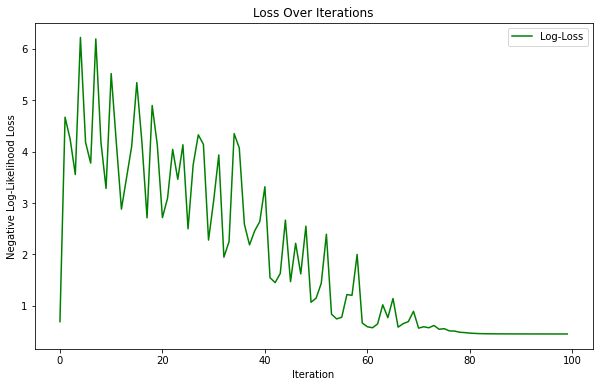

Training Time: 0.344 seconds


In [17]:
start = time.time()

# Setting up our hyperparameters
ALPHA = 0.05        # learning rate
DECAY_RATE = 0.95   # incrementally reduces learning rate
MAX_STEP = 100      # total no. of iterations

# Get the data coordinate matrix, X, and label vector, y
X_train = np.array(X_train)
y_train = np.array(y_train)

# Store guesses of theta, for subsequent analysis
thetas = np.zeros((k, MAX_STEP+1))

# Incrementally going up the gradient function to converge at an optimal theta
losses_ga = []
for t in range(MAX_STEP):
    alpha_t = adjust_learning_rate(ALPHA, t, DECAY_RATE)
    gradient = grad_log_likelihood(thetas[:,t:t+1], y_train, X_train)
    s = alpha_t * gradient
    thetas[:,t+1:t+2] = thetas[:,t:t+1] + s
    losses_ga.append(compute_log_loss(thetas[:,t:t+1], X_train, y_train))

# Storing optimal theta
theta_ga = thetas[:, MAX_STEP:]

end = time.time()
training_time = end - start

# Visualizing training loss
plt.figure(figsize=(10, 6))
plt.plot(losses_ga, label='Log-Loss', color='g')
plt.xlabel('Iteration')
plt.ylabel('Negative Log-Likelihood Loss')
plt.title('Loss Over Iterations')
plt.legend()
plt.show()

print(f"Training Time: {training_time:.3f} seconds")

##### Visualizing the performance of the model on testing data:

Model accuracy: 0.846


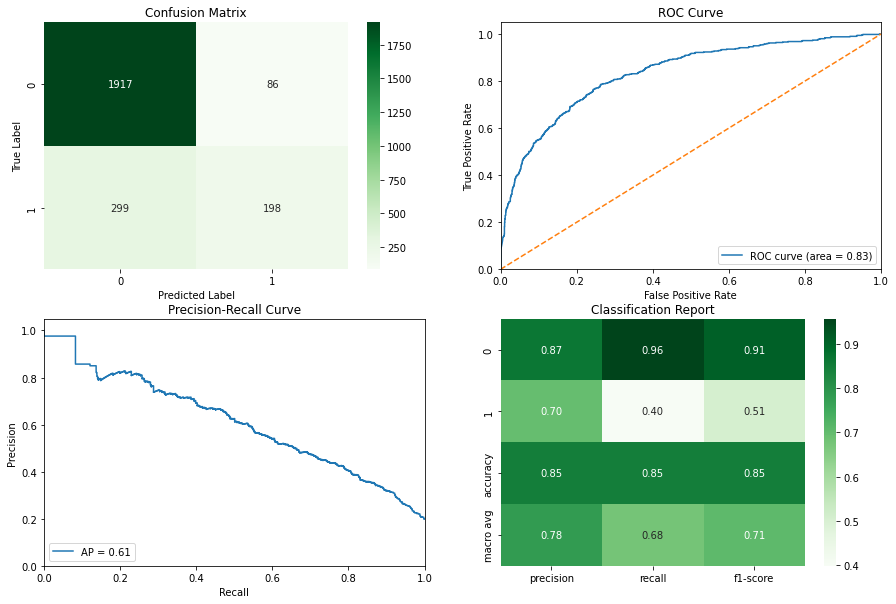

In [18]:
results['Logistic_Regression_GradientAscent'] = {'Training_Time': f'{training_time:.3f} seconds', \
                                                 'Classification_Report': plot_data(X_test, y_test, theta_ga)}

Overall the model performed fairly well. We can see that the model is extremely accurate at predicting False (0) labels, but it is not very good at predicting True (1) labels. 

### Newton's Method

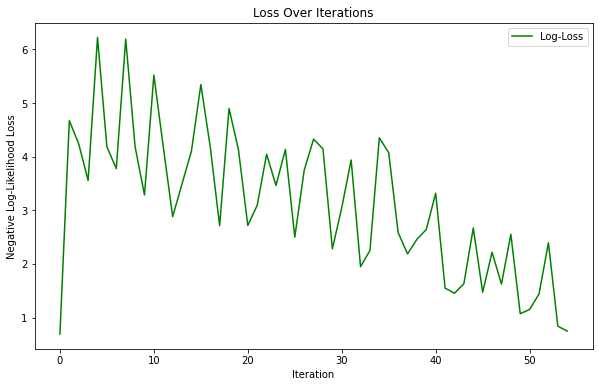

Training Time: 0.713 seconds


In [19]:
start = time.time()

# Setting up our hyperparameters
MAX_STEP = 55      # total no. of iterations

k = X_train.shape[1]
thetas_newt = np.zeros((k, MAX_STEP+1))
losses_newt = []
for t in range(MAX_STEP):
    hessian = hess_log_likelihood(thetas_newt[:,t:t+1], X_train)
    gradient = grad_log_likelihood(thetas_newt[:,t:t+1], y_train, X_train)
    s = solve(hessian, -gradient)
    thetas_newt[:,t+1:t+2] = thetas_newt[:,t:t+1] + s
    losses_newt.append(compute_log_loss(thetas[:,t:t+1], X_train, y_train))
theta_newt = thetas_newt[:, MAX_STEP:]

end = time.time()
training_time = end - start

plt.figure(figsize=(10, 6))
plt.plot(losses_newt, label='Log-Loss', color='g')
plt.xlabel('Iteration')
plt.ylabel('Negative Log-Likelihood Loss')
plt.title('Loss Over Iterations')
plt.legend()
plt.show()

print(f"Training Time: {training_time:.3f} seconds")

I chose a high number for the MAX_STEP hyperparameter because the loss was significantly high at lower iterations, which is indicative of a nonoptimal theta vector. After trial and error, setting MAX_STEP to 150 iterations allowed for the model to converge at an optimal solution. It might be counterintuative to think that the standard gradient ascent approach is nearly as quick as Newton's method. However, this makes intuitive sense because of the decay function.

Model accuracy: 0.8416


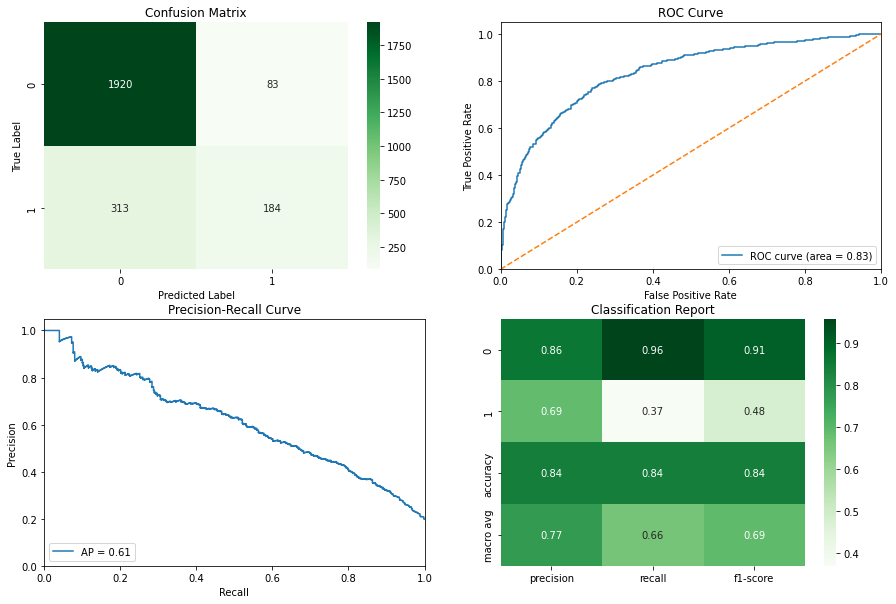

In [20]:
results['Logistic_Regression_NewtonMethod'] = {'Training_Time': f'{training_time:.3f} seconds', \
                                                 'Classification_Report': plot_data(X_test, y_test, theta_newt)}

Surprisingly, this model also does not perform as well as the gradient ascent approach! There might be ways to optimize this approach further, so more research would need to be done to curate the algorithm for this specific dataset.

## 6. Other Models

As a benchmark comparison, the code below covers sklearn's libraries to develop Decision Trees, Support Vector Machines, K-Nearest Neighbors, Random Forest, and Gradient Boosting models. The code will showcase each of the models' performances and it becomes easier to make assumptions on the efficacy of various approaches.

In [21]:
def plot_data_lib_models (X_test, y_test, model):
    """Same as plot_data() function but built for prebuilt models."""
    
    # Data Preparation
    y_pred = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]
    
    # Data Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Model accuracy: \033[1m{accuracy}\033[0m')

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # ROC / AUC
    fp, tp, thresholds = roc_curve(y_test, probabilities)
    roc_auc = auc(fp, tp)
    
    # Precision-Recall Curve / Average Precision Score
    precision, recall, thresholds = precision_recall_curve(y_test, probabilities)
    avg_precision = average_precision_score(y_test, probabilities)
    
    # Classification Report
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    clf_df = pd.DataFrame(clf_report).transpose()
    
    # Visualizing the performance metrics
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', ax=axes[0, 0])
    axes[0, 0].set_title('Confusion Matrix')
    axes[0, 0].set_xlabel('Predicted Label')
    axes[0, 0].set_ylabel('True Label')

    axes[0, 1].plot(fp, tp, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[0, 1].plot([0, 1], [0, 1], linestyle='--')
    axes[0, 1].set_xlim([0.0, 1.0])
    axes[0, 1].set_ylim([0.0, 1.05])
    axes[0, 1].set_xlabel('False Positive Rate')
    axes[0, 1].set_ylabel('True Positive Rate')
    axes[0, 1].set_title('ROC Curve')
    axes[0, 1].legend(loc="lower right")

    axes[1, 0].step(recall, precision, where='post', label=f'AP = {avg_precision:.2f}')
    axes[1, 0].set_xlabel('Recall')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].set_ylim([0.0, 1.05])
    axes[1, 0].set_xlim([0.0, 1.0])
    axes[1, 0].set_title('Precision-Recall Curve')
    axes[1, 0].legend(loc="lower left")

    sns.heatmap(clf_df.iloc[:-1, :-1], annot=True, cmap='Greens', fmt='.2f', ax=axes[1, 1])
    axes[1, 1].set_title('Classification Report')

    plt.show()
    
    return clf_df

##### Iterating through models and outputting their respective performances:

Decision Tree Results:
Training Time: 0.058 seconds
Model accuracy: 0.8424


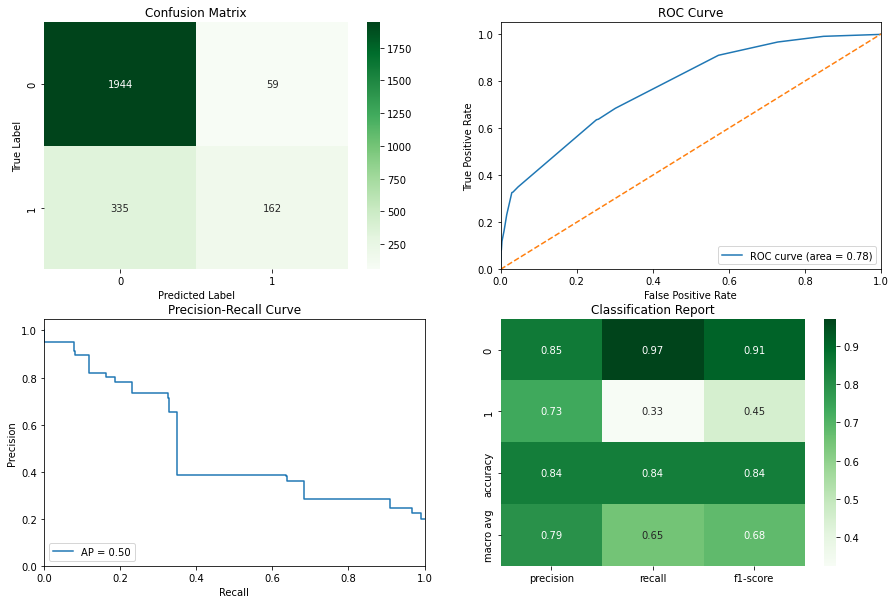

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vector Machine Results:
Training Time: 8.973 seconds
Model accuracy: 0.866


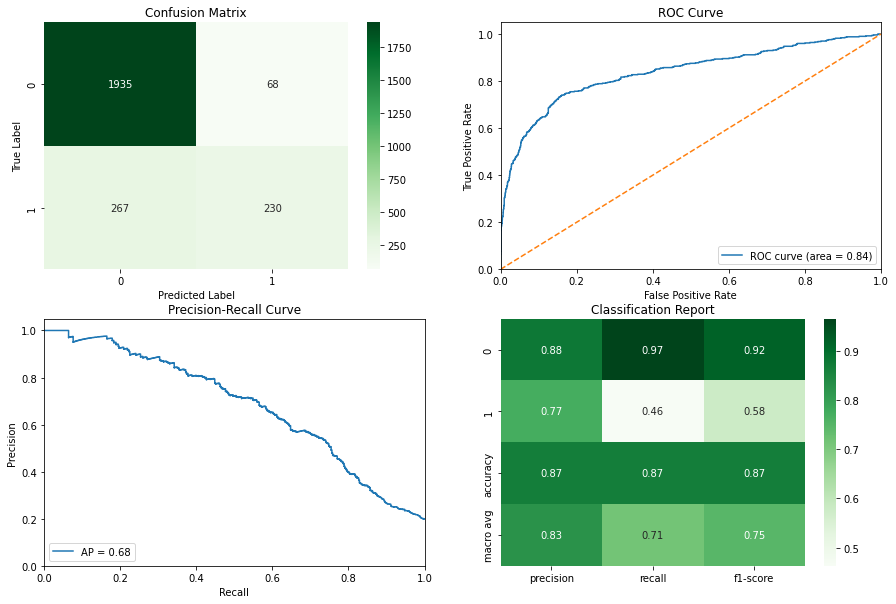

/usr/local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Nearest Neighbors Results:
Training Time: 0.011 seconds
Model accuracy: 0.852


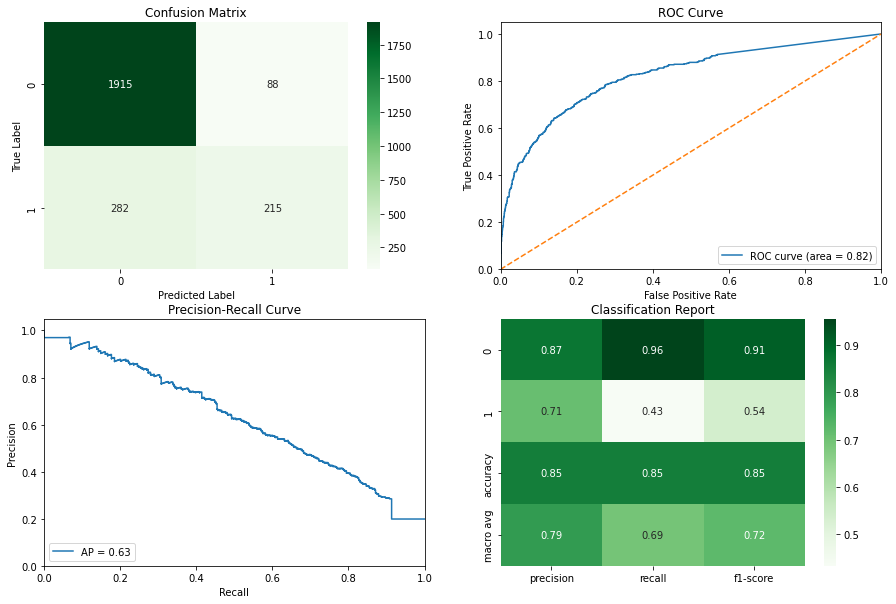

<ipython-input-22-692f77f9c42c>:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Results:
Training Time: 3.340 seconds
Model accuracy: 0.8664


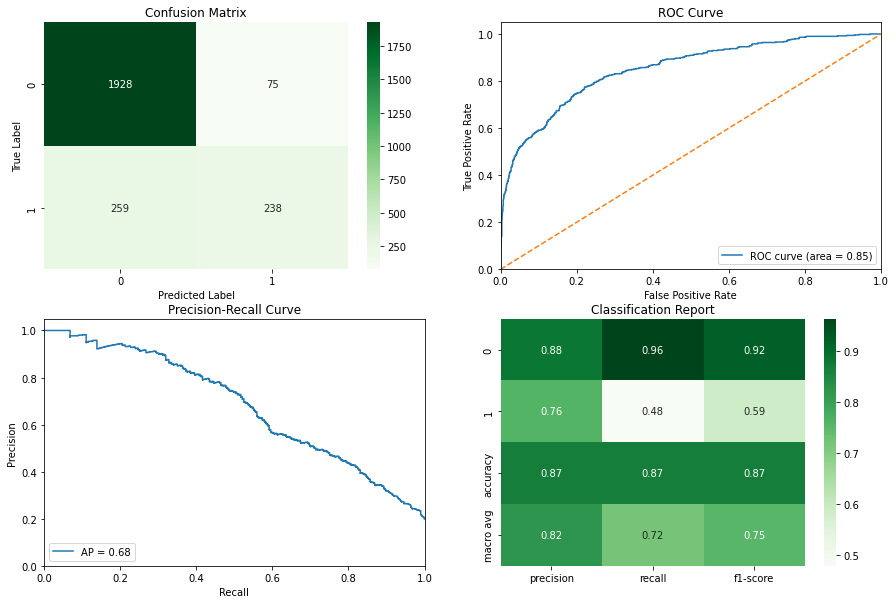

/usr/local/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Results:
Training Time: 4.309 seconds
Model accuracy: 0.8636


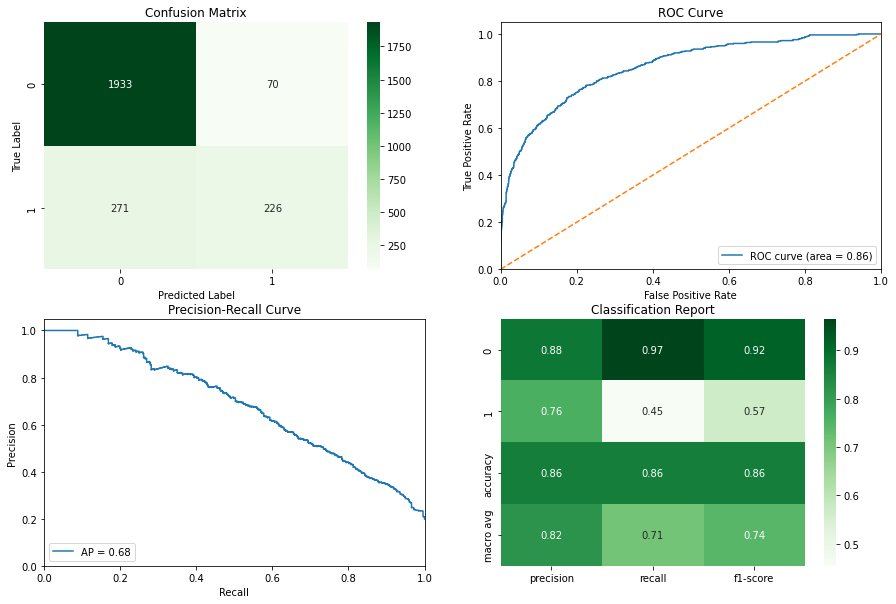

In [22]:
# Importing the libraries for the models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Dictionary with some minimally tuned hyperparameters
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Support Vector Machine': SVC(probability=True, C=10, kernel='rbf', gamma='scale'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto'),
    'Random Forest': RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, subsample=0.9, random_state=42)
}

# Train each model by iterating through the dictionary of models
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    print(f"\033[1m\033[4m{name} Results\033[0m:")
    end = time.time()
    training_time = end - start
    print(f"Training Time: {training_time:.3f} seconds")
    results[f'{name}'] = {'Training_Time': f'{training_time:.3f} seconds', \
                                                 'Classification_Report': plot_data_lib_models(X_test, y_test, model)}

## 7. Observations / Results

From the outputs above, all of the models were able to predict churn rates relatively well. Here are some quick remarks/observations from the outputs:

- The lowest performing model, in terms of accuracy, was the Decision Tree model, which performed very similar to the Newton's Method Logistic Regression model from earlier. The model trains in a fraction of a second.
- The Support Vector Machine Classifier model performed extremely well, but at the cost of training time (highest among all of the models).
- K-Nearest Neighbors performed very well too, and it only takes a fraction of a second to run.
- Random Forest was the most accurate model of them all and it took a few seconds to run.
- Gradient Boosting performed very similar to Random Forest and took just a little longer to run.

One thing to note is that none of the models seem to perform extremely well in predicting churned customers (or 1 label). This most likely has to do with the proportion of 0 and 1 labels in the dataset--there is a disproportionately high number of 0 labels. This makes intuitive sense because a business would most likely not have too many churned customers, unless they are doing extremely bad. The Random forest model has the highest recall (proportion of actual 1 labels that were identified correctly), but the SVM has then highest precision (proportion of 1 labels that were correct). Perhaps a combination approach of some sort might yeild better results.

An organization viewing these results would be able to predict user behavior more than ~85% of the time. Customers that may churn can be associated with a certain risk group, and addressing the needs of these customers can showcase vulnerabilities of the business and may lead to better financial performance.

Further analysis can be done into each of the original independent variables to develop preliminary strategies for the business. For example, if churn is higher in certain geographies, then the business can shape their strategies to either mold to those specific needs, or if it is unprofitable, then they can divest.

Overall, it can be assumed that among all of the models, including the Logistic Regression models developed earlier, that K-Nearest Neighbors performs extremely well on this dataset when balancing both testing time and accuracy. If the objective was to maximize accuracy without much attention to computing costs, then the Random Forest model would be ideal.

##### The results of all models used in this project are available below:

In [23]:
for model, d in results.items():
    print(f'\033[1m{model}\033[0m')
    for item, data in d.items():
        print(f'\033[4m{item}\033[0m:')
        display(data)
    print('\n')

Logistic_Regression_GradientAscent
Training_Time:


'0.344 seconds'

Classification_Report:


,precision,recall,f1-score,support
0,0.865072,0.957064,0.908746,2003.000
1,0.697183,0.398390,0.507042,497.000
accuracy,0.846000,0.846000,0.846000,0.846
macro avg,0.781128,0.677727,0.707894,2500.000
weighted avg,0.831696,0.846000,0.828887,2500.000




Logistic_Regression_NewtonMethod
Training_Time:


'0.713 seconds'

Classification_Report:


,precision,recall,f1-score,support
0,0.859830,0.958562,0.906516,2003.0000
1,0.689139,0.370221,0.481675,497.0000
accuracy,0.841600,0.841600,0.841600,0.8416
macro avg,0.774484,0.664392,0.694095,2500.0000
weighted avg,0.825896,0.841600,0.822057,2500.0000




Decision Tree
Training_Time:


'0.058 seconds'

Classification_Report:


,precision,recall,f1-score,support
0,0.853006,0.970544,0.907987,2003.0000
1,0.733032,0.325956,0.451253,497.0000
accuracy,0.842400,0.842400,0.842400,0.8424
macro avg,0.793019,0.648250,0.679620,2500.0000
weighted avg,0.829155,0.842400,0.817188,2500.0000




Support Vector Machine
Training_Time:


'8.973 seconds'

Classification_Report:


,precision,recall,f1-score,support
0,0.878747,0.966051,0.920333,2003.000
1,0.771812,0.462777,0.578616,497.000
accuracy,0.866000,0.866000,0.866000,0.866
macro avg,0.825279,0.714414,0.749475,2500.000
weighted avg,0.857488,0.866000,0.852400,2500.000




K-Nearest Neighbors
Training_Time:


'0.011 seconds'

Classification_Report:


,precision,recall,f1-score,support
0,0.871643,0.956066,0.911905,2003.000
1,0.709571,0.432596,0.537500,497.000
accuracy,0.852000,0.852000,0.852000,0.852
macro avg,0.790607,0.694331,0.724702,2500.000
weighted avg,0.839423,0.852000,0.837473,2500.000




Random Forest
Training_Time:


'3.340 seconds'

Classification_Report:


,precision,recall,f1-score,support
0,0.881573,0.962556,0.920286,2003.0000
1,0.760383,0.478873,0.587654,497.0000
accuracy,0.866400,0.866400,0.866400,0.8664
macro avg,0.820978,0.720715,0.753970,2500.0000
weighted avg,0.857480,0.866400,0.854159,2500.0000




Gradient Boosting
Training_Time:


'4.309 seconds'

Classification_Report:


,precision,recall,f1-score,support
0,0.877042,0.965052,0.918945,2003.0000
1,0.763514,0.454728,0.569987,497.0000
accuracy,0.863600,0.863600,0.863600,0.8636
macro avg,0.820278,0.709890,0.744466,2500.0000
weighted avg,0.854472,0.863600,0.849572,2500.0000
